# NLP Regular expressions

### Content of task: https://github.com/apohllo/pjn/blob/master/1-regexp.md

In [3]:
# full data preprocessing has been provided in script scripts.py in the same dir

### 1. get all monetary values expressed in PLN from dataset for judgments in 2015 (prepocessing in scripts.py)
### 2. prepare histograms 

In [4]:
import json
import os.path
from glob import glob
import os
import re
import io
import matplotlib.pyplot as plt

In [5]:
def getAllValues(values_files):
    i = 0
    final_values = []
    for file in values_files:
        with io.open(file, "r") as datafile:
            for line in datafile:
                values = line.split(";")
                for value in values:
                    try:
                        float_val = float(value)
                        final_values.append(float_val)
                    except ValueError:
                        i = i+1
                        print("Could not convert to float: ", value)
            print("Couldn't convert to float: ", i)
            return final_values

digitValuesFile = "../data/full-results/norm-full-values2015-reduced.txt"
digitShortcutsFile = "../data/full-results/norm-full-values2015-shortcuts.txt"
values_files = [digitValuesFile, digitShortcutsFile]
all_values = getAllValues(values_files)

Could not convert to float:  
Could not convert to float:  
Couldn't convert to float:  2


Elements matched:
[  8.04869000e+05   2.00000000e+00   2.00000000e+00   5.00000000e+00
   6.00000000e+00   4.00000000e+00   2.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
Bins boundaries:
[  0.00000000e+00   5.00000000e+10   1.00000000e+11   1.50000000e+11
   2.00000000e+11   2.50000000e+11   3.00000000e+11   3.50000000e+11
   4.00000000e+11   4.50000000e+11   5.00000000e+11   5.50000000e+11
   6.00000000e+11   6.50000000e+11   7.00000000e+11   7.50000000e+11
   8.00000000e+11   8.50000000e+11   9.00000000e+11   9.50000000e+11
   1.00000000e+12]


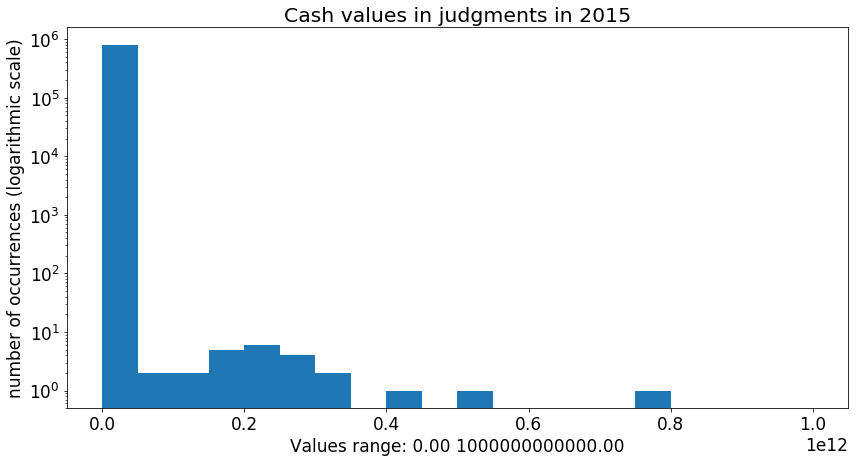

In [63]:
def plotHistogram(values, min_val, max_val, bins, show_info=True, logarithmic=True):
    events, edges, patches = plt.hist(values, range=(min_val, max_val), bins=bins, log=logarithmic)
    if show_info:
        print("Elements matched:")
        print(events)
        print("Bins boundaries:")
        print(edges)

    plt.xlabel('Values range: %.2f %.2f' % (min_val, max_val))
    plt.ylabel('number of occurrences (logarithmic scale)')
    plt.title('Cash values in judgments in 2015')
    plt.rcParams["figure.figsize"] = [14,7]
    plt.rcParams.update({'font.size': 17})
    plt.show()

plotHistogram(all_values, min(all_values), 1e12, 20)

Elements matched:
[  6.58302000e+05   4.61040000e+04   2.34080000e+04   1.26000000e+04
   9.54100000e+03   5.85800000e+03   5.30800000e+03   3.57600000e+03
   3.48600000e+03   2.28000000e+03   2.88600000e+03   1.48800000e+03
   1.73200000e+03   1.16000000e+03   1.10900000e+03   8.74000000e+02
   9.92000000e+02   6.38000000e+02   7.59000000e+02   1.43300000e+03]
Bins boundaries:
[       0.    50000.   100000.   150000.   200000.   250000.   300000.
   350000.   400000.   450000.   500000.   550000.   600000.   650000.
   700000.   750000.   800000.   850000.   900000.   950000.  1000000.]


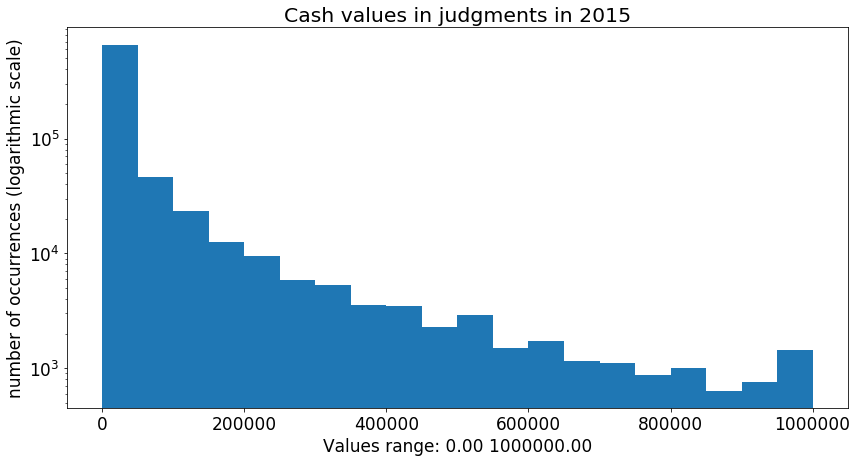

In [64]:
plotHistogram(all_values, min(all_values), 1e6, 20)

Elements matched:
[  2.20230000e+04   1.40000000e+01   2.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   2.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   2.00000000e+00   2.00000000e+00   3.00000000e+00   2.00000000e+00
   1.00000000e+00   1.00000000e+00   2.00000000e+00   0.00000000e+00]
Bins boundaries:
[  1.00000000e+06   1.50009500e+10   3.00009000e+10   4.50008500e+10
   6.00008000e+10   7.50007500e+10   9.00007000e+10   1.05000650e+11
   1.20000600e+11   1.35000550e+11   1.50000500e+11   1.65000450e+11
   1.80000400e+11   1.95000350e+11   2.10000300e+11   2.25000250e+11
   2.40000200e+11   2.55000150e+11   2.70000100e+11   2.85000050e+11
   3.00000000e+11]


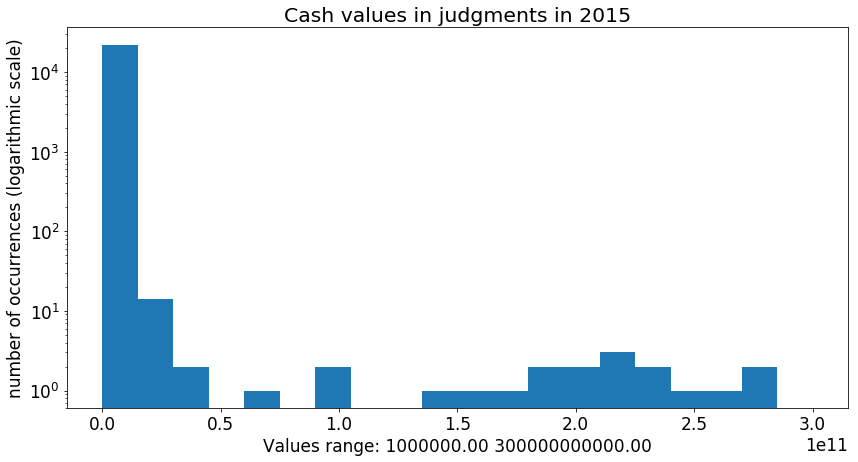

In [65]:
plotHistogram(all_values, 1e6, 3e11, 20)

### 3. Count judgments in 2015 reffering to article 445

In [66]:
def articleMentionedInRegulations(regulations):
    for reg in regulations:
        if reg['journalNo'] == 16 and reg['journalYear'] == 1964 and reg['journalEntry'] == 93 and "445" in reg['text']:
            return True
    return False;

def getJudgmentsNumByArticle(jsons_dir):
    pattern = os.path.join(jsons_dir, 'judgments*.json')
    i = 0
    articles_num = 0
    for file_name in glob(pattern):
        i = i+1
        if i%500 == 0:
            print("already done files: ", i)
        with open(file_name) as f:
            curr_json = json.load(f)
            items = curr_json['items']
            # print(items)
            for item in items:
                if '2015' in item['judgmentDate']:
                    regulations = item['referencedRegulations']
                    if articleMentionedInRegulations(regulations):
                        articles_num = articles_num + 1
    return articles_num

In [67]:
jsons_dir_full = '../data/json/'
articles_num = getJudgmentsNumByArticle(jsons_dir_full)
print("Judgments reffering to article 445: ", articles_num)

already done files:  500
already done files:  1000
already done files:  1500
already done files:  2000
already done files:  2500
already done files:  3000
Judgments reffering to article 445:  2560


### 4. Count judgments in 2015 containing word "szkoda"  in any lexicate form

In [68]:
def contentContainsWord(text_content):
    regex = r"[^a-zA-Z](szkod[a|y|zie|ę|o|om|ami|ach]|szkód)[^a-zA-Z]"
    return bool(re.search(regex, text_content))



def getJudgmentsNumByWord(jsons_dir):
    pattern = os.path.join(jsons_dir, 'judgments*.json')
    i = 0
    articles_num = 0
    for file_name in glob(pattern):
        i = i+1
        if i%500 == 0:
            print("already done files: ", i)
        with open(file_name) as f:
            curr_json = json.load(f)
            items = curr_json['items']
            for item in items:
                if '2015' in item['judgmentDate']:
                    text_content = item['textContent']
                    if contentContainsWord(text_content):
                        articles_num = articles_num + 1
    return articles_num

In [69]:
jsons_dir_full = '../data/json/'
matchingJudgments = getJudgmentsNumByWord(jsons_dir_full)
print("Judgements in 2015 containing word 'szkoda': ", matchingJudgments)

already done files:  500
already done files:  1000
already done files:  1500
already done files:  2000
already done files:  2500
already done files:  3000
Judgements in 2015 containing word 'szkoda':  17767


In [7]:
def contentContainsWord2(text_content):
    regex = r"(?<![a-zA-Z])(szkod[a|y|zie|ę|o|om|ami|ach]|szkód)(?![a-zA-Z])"
    return bool(re.search(regex, text_content))



def getJudgmentsNumByWord2(jsons_dir):
    pattern = os.path.join(jsons_dir, 'judgments*.json')
    i = 0
    articles_num = 0
    for file_name in glob(pattern):
        i = i+1
        if i%500 == 0:
            print("already done files: ", i)
        with open(file_name) as f:
            curr_json = json.load(f)
            items = curr_json['items']
            for item in items:
                if '2015' in item['judgmentDate']:
                    text_content = item['textContent']
                    if contentContainsWord2(text_content):
                        articles_num = articles_num + 1
    return articles_num

In [8]:
jsons_dir_full = '../data/json/'
matchingJudgments2 = getJudgmentsNumByWord2(jsons_dir_full)
print("Judgements in 2015 containing word 'szkoda': ", matchingJudgments2)

already done files:  500
already done files:  1000
already done files:  1500
already done files:  2000
already done files:  2500
already done files:  3000
Judgements in 2015 containing word 'szkoda':  17767


In [9]:
def contentContainsWord3(text_content):
    regex = r"\b(szkod[a|y|zie|ę|o|om|ami|ach]|szkód)\b"
    return bool(re.search(regex, text_content))



def getJudgmentsNumByWord3(jsons_dir):
    pattern = os.path.join(jsons_dir, 'judgments*.json')
    i = 0
    articles_num = 0
    for file_name in glob(pattern):
        i = i+1
        if i%500 == 0:
            print("already done files: ", i)
        with open(file_name) as f:
            curr_json = json.load(f)
            items = curr_json['items']
            for item in items:
                if '2015' in item['judgmentDate']:
                    text_content = item['textContent']
                    if contentContainsWord3(text_content):
                        articles_num = articles_num + 1
    return articles_num

In [10]:
jsons_dir_full = '../data/json/'
matchingJudgments3 = getJudgmentsNumByWord3(jsons_dir_full)
print("Judgements in 2015 containing word 'szkoda': ", matchingJudgments3)

already done files:  500
already done files:  1000
already done files:  1500
already done files:  2000
already done files:  2500
already done files:  3000
Judgements in 2015 containing word 'szkoda':  17739
